 Generating new data with CTGAN, whole distribution

In [1]:
 # pip install ctgan pandas

import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from ctgan import CTGAN

pd.set_option('display.float_format', '{:.1f}'.format)
df = pd.read_csv("bank_numeric.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
1,42,4,2,2,0,0,1,1,2,5,5,562,2,-1,0,3,1
2,37,9,1,1,0,1,1,0,2,6,5,608,1,-1,0,3,1
3,38,0,2,1,0,100,1,0,2,7,5,786,1,-1,0,3,1
4,30,1,1,1,0,309,1,0,2,7,5,1574,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5252,34,1,2,1,0,-72,1,0,0,7,7,273,5,-1,0,3,0
5253,33,1,2,0,0,1,1,0,0,20,4,257,1,-1,0,3,0
5254,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
5255,32,9,2,1,0,29,0,0,0,19,8,156,2,-1,0,3,0


In [2]:
target = "deposit"

# typical X/y split, choose target variable as needed
X = df.drop([target], axis=1)
y = df[target]

# initialize CTGAN and start training
# CTGAN is based on neural networks (GAN), that's why we have to specify epochs
ctgan = CTGAN()
ctgan.fit(df, epochs=100)

# get the data from the model
num_new_data = 10000
synthetic_df = ctgan.sample(num_new_data)

In [3]:
# combine with original data
df = pd.concat([df, synthetic_df])

In [ ]:
df

# now I have in 3 times more data
# but the distribution is the same

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
1,42,4,2,2,0,0,1,1,2,5,5,562,2,-1,0,3,1
2,37,9,1,1,0,1,1,0,2,6,5,608,1,-1,0,3,1
3,38,0,2,1,0,100,1,0,2,7,5,786,1,-1,0,3,1
4,30,1,1,1,0,309,1,0,2,7,5,1574,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,28,4,1,1,0,-101,0,0,0,25,7,99,2,0,0,3,1
9996,40,7,1,0,0,1864,1,0,0,28,2,166,1,-1,0,3,0
9997,25,9,2,1,0,179,1,0,2,32,5,892,2,-1,0,3,0
9998,33,9,1,0,1,-32,1,0,0,23,5,441,2,0,0,3,0


<Axes: xlabel='deposit', ylabel='Count'>

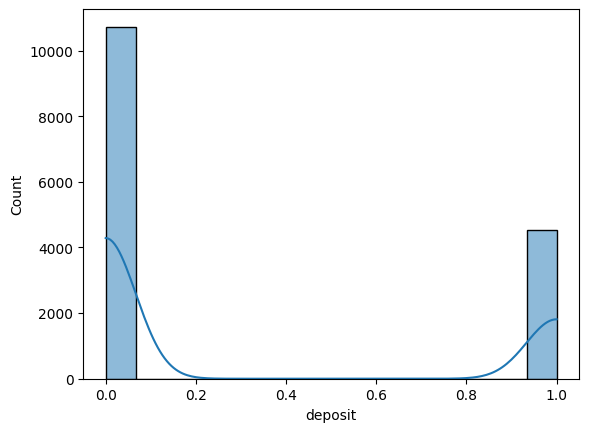

In [6]:
 # the distribution is identical, we just have more of the data
# one idea: generate more data => then use undersampling to alter the distribution
sns.histplot(data=df, x="deposit", kde=True)